In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
from scipy import signal
from matplotlib import animation
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Setting up video encoder paths
ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)

In [ ]:
#1. Solu muuttuu eläväksi, jos sen naapureista tasan kolme on eläviä.
#2. Solu pysyy elävänä, jos sen naapureista tasan 2 tai 3 on eläviä. Muuten solu kuolee.

In [208]:
Size=16
world_array=np.random.choice([0, 1], size=(Size,Size))
kernel = np.ones((3,3), dtype=int)
kernel[1,1] = 0
print(world_array)

[[0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1]
 [0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0]
 [1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0]
 [0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1]
 [0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0]
 [1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0]
 [1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0]
 [0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0]
 [1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0]
 [0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0]
 [0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1]]


In [240]:
class GameOfLife:
    def __init__(self,initial_state=None):
        print(initial_state)
        self.initial_state=initial_state
        self.steps=None
        
    def run(self,duration=10):
        # One game of life run
        steps=[]
        world_array=self.initial_state.copy()
        kernel = np.ones((3,3), dtype=int)
        kernel[1,1] = 0
        steps.append(world_array.copy())
        for i in range(1,duration):
            # Very clever way of checking cells neighbors with convolution (not my own invention :)
            neighbors_array = signal.convolve2d(world_array, kernel, mode="same",boundary='wrap')
            # Check the rules of life and death
            death_mask=np.logical_or(neighbors_array==2, neighbors_array==3) 
            birth_mask=neighbors_array==3
            # Update the array
            np.place(world_array, death_mask, [0])
            np.place(world_array, birth_mask, [1])
            steps.append(world_array.copy())
           # Check if the world is static or not
            print(np.all(steps[i-1]==steps[i]))
            
        self.steps=steps
        return steps


In [241]:
game=GameOfLife(initial_state=world_array)
game.run(30)
steps=game.steps

[[0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1]
 [0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0]
 [1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0]
 [0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1]
 [0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0]
 [1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0]
 [1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0]
 [0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0]
 [1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0]
 [0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0]
 [0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1]]
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [242]:
world_array

array([[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]])

In [243]:
game.initial_state

array([[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]])

In [244]:
game.steps[0]

array([[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]])

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
0


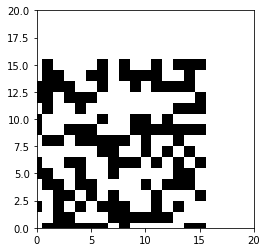

In [245]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))
#line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    ax.set_data([], [])
    return ax

# animation function.  This is called sequentially
def animate(i):
    frame=steps[i]
    print(i)
    size=frame.shape[0]
    #G is a NxNx3 matrix
    G = np.zeros((size,size,3))
    #Where we set the RGB for each pixel
    G[frame>0.5] = [0,0,0]
    G[frame<0.5] = [1,1,1]

    return ax.imshow(G,interpolation='nearest')

a=0.5
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=None,
                               frames=29, interval=500, blit=False)



FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
#C:\Users\arttu.lehtinen\Desktop
anim.save(os.path.join('C:/','Users\\arttu.lehtinen\\Desktop\\projektit','basic_animation.mp4'), writer = FFwriter)
#

plt.show()

In [246]:
HTML(anim.to_html5_video())

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
